In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ham1000-segmentation-and-classification/GroundTruth.csv
/kaggle/input/ham1000-segmentation-and-classification/images/ISIC_0030912.jpg
/kaggle/input/ham1000-segmentation-and-classification/images/ISIC_0028933.jpg
/kaggle/input/ham1000-segmentation-and-classification/images/ISIC_0030585.jpg
/kaggle/input/ham1000-segmentation-and-classification/images/ISIC_0028394.jpg
/kaggle/input/ham1000-segmentation-and-classification/images/ISIC_0033697.jpg
/kaggle/input/ham1000-segmentation-and-classification/images/ISIC_0030062.jpg
/kaggle/input/ham1000-segmentation-and-classification/images/ISIC_0031213.jpg
/kaggle/input/ham1000-segmentation-and-classification/images/ISIC_0027799.jpg
/kaggle/input/ham1000-segmentation-and-classification/images/ISIC_0028100.jpg
/kaggle/input/ham1000-segmentation-and-classification/images/ISIC_0027960.jpg
/kaggle/input/ham1000-segmentation-and-classification/images/ISIC_0028872.jpg
/kaggle/input/ham1000-segmentation-and-classification/images/ISIC_003131

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras.utils as image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

# 데이터 파악
데이터 프레임을 확인하면 레이블에 이름과 7종의 병명이 있고 one-hot-encoding이 되어있습니다.

In [3]:
df = pd.read_csv("/kaggle/input/ham1000-segmentation-and-classification/GroundTruth.csv")
df.head(5)

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


데이터의 총 개수를 확인 후 7종의 병명을 묶어 cell_type이라는 리스트로 만들었습니다.

In [4]:
print('number of images: ',len(df))
print(df.columns)
cell_type = ['MEL','NV','BCC','AKIEC','BKL','DF','VASC']

number of images:  10015
Index(['image', 'MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC'], dtype='object')


In [5]:
labels = df[cell_type]
labels.shape

(10015, 7)

각각의 이미지의 경로를 저장하고 series 객체를 list로 형을 변환해서 후에 사용하기 용이하게 했습니다.

In [6]:
image_path = '/kaggle/input/ham1000-segmentation-and-classification/images'
path = []
for i in range(10015):
    path.append(image_path + '/' + df['image'][i] + '.jpg')
    
path = list(map(str,path))

이후에 사용될 변수들을 선언 및 초기화하였습니다.

In [7]:
image_size = 32
batch_size = 64
validation_split = 0.2

# 이미지 로드
이미지들을 로드한 후 path 리스트에 저장된 주소에 있는 이미지들을 크기를 32 x 32로 변환하고 numpy array로 형변환하였습니다.

In [8]:
def resize_image(x):
    new_image = Image.open(x).resize((image_size,image_size))
    print(type(new_image))
    return np.array(new_image,dtype = np.float32)

images = list(map(resize_image, path))

<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.Image.Image'>
<class 'PIL.

In [9]:
images = np.array(images, dtype = np.float32)
print(images[1].shape)

(32, 32, 3)


## VGG16을 사용하기 위한 전처리 과정

In [10]:
from keras.applications.vgg16 import preprocess_input
X = preprocess_input(images)
y = labels

# train_test_split
전체 데이터를 train, test데이터로 분류한 후에 train 데이터에서 다시 validation 데이터를 나누었습니다.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8012, 32, 32, 3) (2003, 32, 32, 3) (8012, 7) (2003, 7)


In [12]:
X_train, X_valid,y_train,y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 22)

# 모델 생성

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D , MaxPooling2D , BatchNormalization, Activation, Flatten ,  GlobalAveragePooling2D, Dense ,  Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping

In [14]:
from tensorflow.keras.applications import VGG16

def model_vgg16(in_shape=(image_size, image_size, 3), n_classes=7):
    input_tensor = Input(shape=in_shape)
    
    base_model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')
    bm_output = base_model.output

    x = GlobalAveragePooling2D()(bm_output)
    x = Dense(128, activation='relu', name='fc1')(x)
    output = Dense(n_classes, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)
    model.summary()
    
    return model

# 모델 학습

In [15]:
model = model_vgg16(in_shape=(image_size, image_size, 3), n_classes=7)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

history = model.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 100,
                    callbacks=[rlr_cb, ely_cb])

58889256/58889256 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

# 모델 평가
## 정확도와 loss를 그래프로 시각화하였습니다.

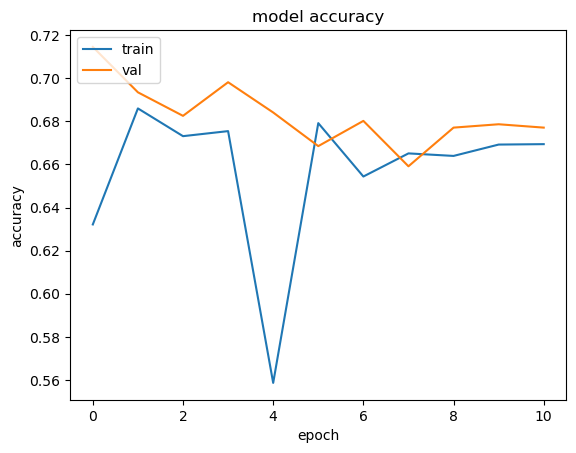

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

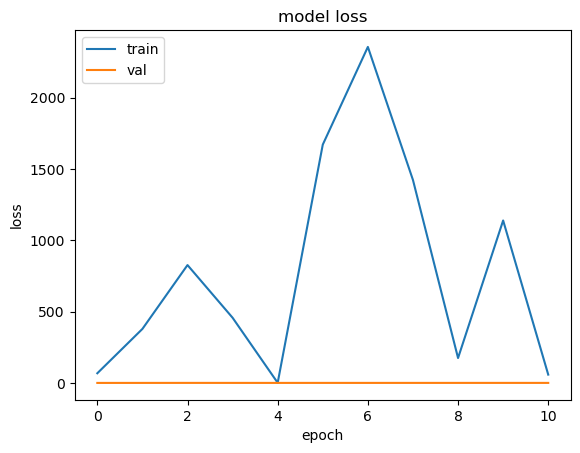

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 1s 9ms/step - loss: 1.0422 - accuracy: 0.6625


[1.042165756225586, 0.6625062227249146]

# Confusion Matrix
### Confusion Matrix를 사용하여서 모델이 예측을 정확히 하였는지 확인하였습니다.

In [19]:
y_pred = model.predict(X_test)
y_pred_labels = []
for i in y_pred:
    y_pred_labels.append(np.argmax(i))
    
y_test_list = y_test.values.tolist()
y_test_list = np.array(y_test_list,np.float32)
y_test_labels = []
for i in y_test_list:
    y_test_labels.append(np.argmax(i))

63/63 [==============================] - 0s 5ms/step


Accuracy :  0.6625062406390414
Report :                precision    recall  f1-score   support

           0       0.17      0.02      0.03       228
           1       0.67      0.99      0.80      1337
           2       0.00      0.00      0.00       100
           3       0.00      0.00      0.00        74
           4       0.00      0.00      0.00       211
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        31

    accuracy                           0.66      2003
   macro avg       0.12      0.14      0.12      2003
weighted avg       0.47      0.66      0.54      2003



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


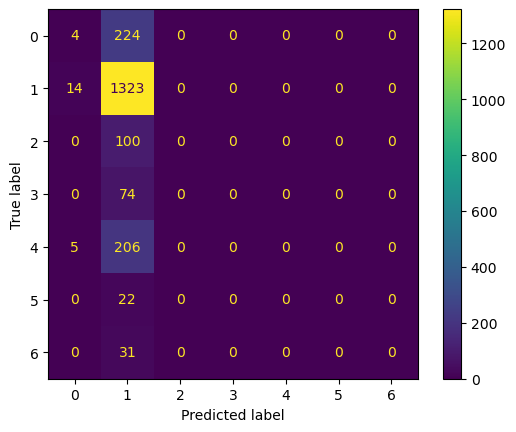

In [20]:
from sklearn import metrics

print ("Accuracy : ", metrics.accuracy_score(y_test_labels,y_pred_labels))         # Evaulating predictions with test labels
print ("Report : ",  metrics.classification_report(y_test_labels, y_pred_labels))

confusion_matrix = metrics.confusion_matrix(y_test_labels, y_pred_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix)
cm_display.plot()
plt.show()

위의 코드는 데이터 불균형으로 인해 모델이 거의 모든 예측을 1번 레이블로 한 것을 확인할 수 있습니다.

# OverSampling
### 위와 같은 데이터 불균형을 해결하기위해 oversampling을 진행했습니다.

In [21]:
from imblearn.over_sampling import RandomOverSampler 
oversample = RandomOverSampler()

X_over_2d = X.reshape(X.shape[0], -1)

y_over = y.values.tolist()
y_over = np.array(y_over,np.float32)

## OverSampling 적용 전 데이터 분포

Text(0.5, 1.0, 'Frequency Distribution of Classes')

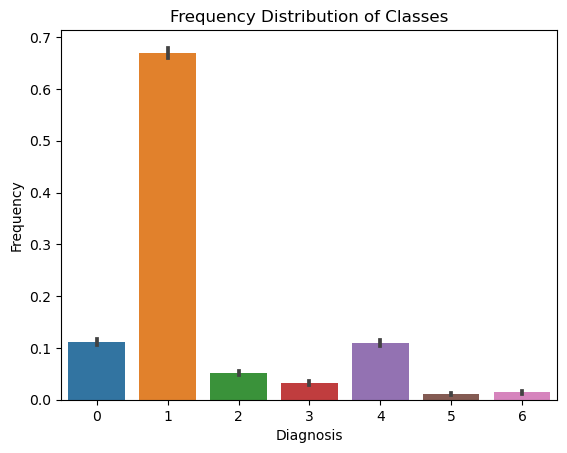

In [22]:
import seaborn as sns
sns.barplot(y_over)
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Classes')

In [23]:
X_over_2d,y_over = oversample.fit_resample(X_over_2d,y_over)

In [24]:
print(X_over_2d.shape)
X_over = X_over_2d.reshape(X_over_2d.shape[0],image_size,image_size,3)
print(X_over.shape)

(46935, 3072)
(46935, 32, 32, 3)


## OverSampling 적용 후 데이터 분포

Text(0.5, 1.0, 'Frequency Distribution of Classes')

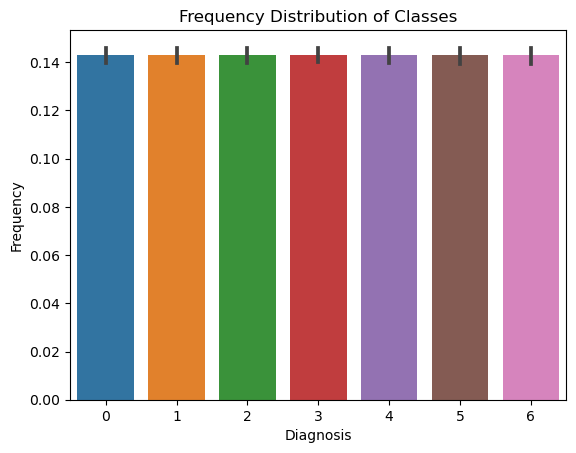

In [25]:
import seaborn as sns
sns.barplot(y_over)
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Classes')

# OverSampling 이후 모델 재생성 및 재학습

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.2, random_state = 22)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train, X_valid,y_train,y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 22)

(37548, 32, 32, 3) (9387, 32, 32, 3) (37548, 7) (9387, 7)


In [27]:
model = model_vgg16(in_shape=(image_size, image_size, 3), n_classes=7)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

history = model.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 100,
                    callbacks=[rlr_cb, ely_cb])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

# OverSampling된 모델 평가

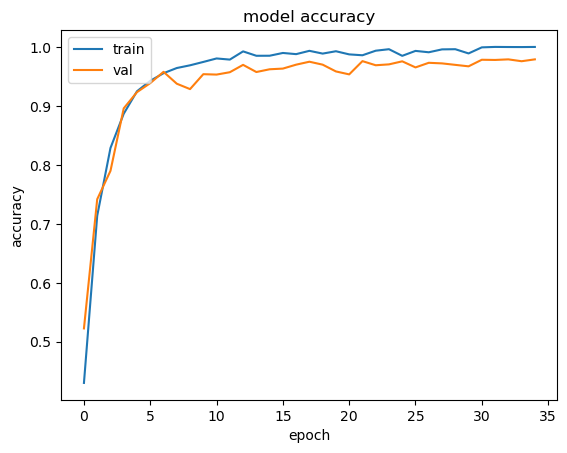

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

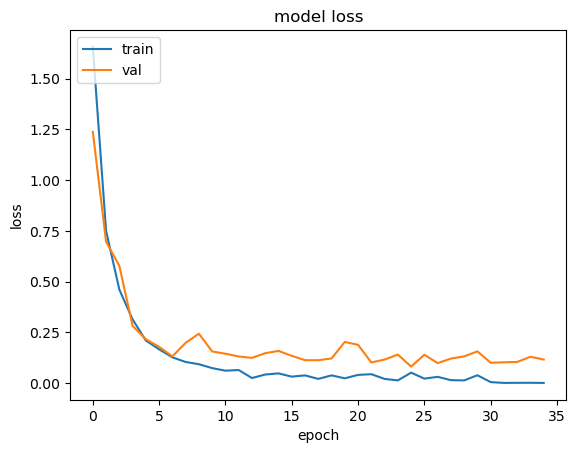

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
model.evaluate(X_test,y_test)

294/294 [==============================] - 2s 7ms/step - loss: 0.2319 - accuracy: 0.9603


[0.23187874257564545, 0.9602642059326172]

# OverSampling된 모델 Confusion Matrix 결과

In [31]:
y_pred = model.predict(X_test)
y_pred_labels = []
for i in y_pred:
    y_pred_labels.append(np.argmax(i))

y_test_labels = []
for i in y_test:
    y_test_labels.append(np.argmax(i))

294/294 [==============================] - 2s 5ms/step


Accuracy :  0.960264195163524
Report : 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      1337
           1       0.91      0.85      0.88      1316
           2       0.98      0.99      0.98      1391
           3       0.99      0.99      0.99      1385
           4       0.95      0.95      0.95      1330
           5       0.99      0.99      0.99      1281
           6       0.99      1.00      0.99      1347

    accuracy                           0.96      9387
   macro avg       0.96      0.96      0.96      9387
weighted avg       0.96      0.96      0.96      9387



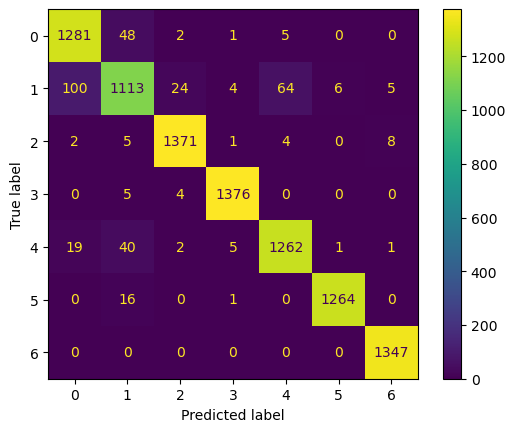

In [32]:
from sklearn import metrics

print ("Accuracy : ", metrics.accuracy_score(y_test_labels,y_pred_labels))         # Evaulating predictions with test labels
print ("Report : \n",  metrics.classification_report(y_test_labels, y_pred_labels))

confusion_matrix = metrics.confusion_matrix(y_test_labels, y_pred_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix)
cm_display.plot()
plt.show()

Confusion matrix를 확인하면 학습이 매우 잘 된 것을 확인할 수 있습니다.
추후에 CAM 적용과 vgg의 preprocess_input을 활용한 코드를 추가하겠습니다.

In [33]:
last_conv_layer = model.get_layer('block5_conv3')
classifier_input = model.layers[-1].input
classifier_weights = model.layers[-1].get_weights()[0]

In [34]:
def get_cam(image, model, last_conv_layer, classifier_input, classifier_weights):
    cam_model = Model(inputs=model.input, outputs=(last_conv_layer.output, classifier_input))
    conv_output, predictions = cam_model.predict(image)
    
    predicted_class = np.argmax(predictions[0])
    cam_weights = classifier_weights[:, predicted_class]
    
    conv_output = np.squeeze(conv_output)  # 배치 차원이 있으면 제거
    cam_output = np.dot(conv_output.reshape((-1, 128)), cam_weights)
    cam_output = cv2.resize(cam_output, (image_size, image_size))
    cam_output = np.maximum(cam_output, 0)  # apply ReLU
    cam_output = cam_output / cam_output.max()

    return cam_output

In [38]:
import cv2
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = preprocess_input(img)
    return img, np.expand_dims(img, axis=0)

In [39]:
def visualize_cam(image, cam_output):
    plt.figure(figsize=(8, 8))
    plt.imshow(image, alpha=0.6)
    plt.imshow(cam_output, cmap='jet', alpha=0.4)
    plt.axis('off')
    plt.show()

In [40]:
image_path = "/kaggle/input/ham1000-segmentation-and-classification/images/ISIC_0024307.jpg"
image, processed_image = preprocess_image(image_path)
cam_output = get_cam(processed_image, model, last_conv_layer, classifier_input, classifier_weights)
visualize_cam(image, cam_output)

1/1 [==============================] - 0s 311ms/step


IndexError: index 35 is out of bounds for axis 1 with size 7